## Task-D: Collinear features and their effect on linear models

In [1]:
%matplotlib inline
import warnings
warnings.filterwarnings("ignore")
import pandas as pd
import numpy as np
from sklearn.datasets import load_iris
from sklearn.linear_model import SGDClassifier
from sklearn.model_selection import GridSearchCV
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
import tqdm
from sklearn.model_selection import RandomizedSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn import svm

In [2]:
data = pd.read_csv('task_d.csv')

In [3]:
data.head()

,x,y,z,x*x,2*y,2*z+3*x*x,w,target
0,-0.581066,0.841837,-1.012978,-0.604025,0.841837,-0.665927,-0.536277,0
1,-0.894309,-0.207835,-1.012978,-0.883052,-0.207835,-0.917054,-0.522364,0
2,-1.207552,0.212034,-1.082312,-1.150918,0.212034,-1.166507,0.205738,0
3,-1.364174,0.002099,-0.943643,-1.280666,0.002099,-1.266540,-0.665720,0
4,-0.737687,1.051772,-1.012978,-0.744934,1.051772,-0.792746,-0.735054,0


In [4]:
X = data.drop(['target'], axis=1).values
y = data['target'].values

### Doing perturbation test to check the presence of collinearity  

#### Task: 1 Logistic Regression
<pre>


1. <b>Finding the Correlation between the features</b>
    a. check the correlation between the features
    b. plot heat map of correlation matrix using seaborn heatmap
2. <b>Finding the best model for the given data</b>
    a. Train Logistic regression on data(X,Y) that we have created in the above cell
    b. Find the best hyper prameter alpha with hyper parameter tuning using k-fold cross validation (grid search CV or         
    random search CV make sure you choose the alpha in log space)
    c. Creat a new Logistic regression with the best alpha
    (search for how to get the best hyper parameter value), name the best model as 'best_model'
    
3. <b>Getting the weights with the original data</b>
    a. train the 'best_model' with X, Y
    b. Check the accuracy of the model 'best_model_accuracy'
    c. Get the weights W using best_model.coef_

4. <b>Modifying original data</b>
    a. Add a noise(order of 10^-2) to each element of X 
    and get the new data set X' (X' = X + e)
    b. Train the same 'best_model' with data (X', Y)
    c. Check the accuracy of the model 'best_model_accuracy_edited'
    d. Get the weights W' using best_model.coef_
    
5. <b> Checking deviations in metric and weights </b>
    a. find the difference between 'best_model_accuracy_edited' and 'best_model_accuracy'
    b. find the absolute change between each value of W and W' ==> |(W-W')|
    c. print the top 4 features which have higher % change in weights 
    compare to the other feature

</pre>

#### Task: 2 Linear SVM

<pre>
1. Do the same steps (2, 3, 4, 5) we have done in the above task 1.
</pre>

<strong><font color='red'>Do write the observations based on the results you get from the deviations of weights in both Logistic Regression and linear SVM</font></strong>

## Task 1

### 1. Finding the Correlation between the features

In [5]:
data = pd.read_csv('task_d.csv')
data.corr()

,x,y,z,x*x,2*y,2*z+3*x*x,w,target
x,1.000000,-0.205926,0.812458,0.997947,-0.205926,0.996252,0.583277,0.728290
y,-0.205926,1.000000,-0.602663,-0.209289,1.000000,-0.261123,-0.401790,-0.690684
z,0.812458,-0.602663,1.000000,0.807137,-0.602663,0.847163,0.674486,0.969990
x*x,0.997947,-0.209289,0.807137,1.000000,-0.209289,0.997457,0.583803,0.719570
2*y,-0.205926,1.000000,-0.602663,-0.209289,1.000000,-0.261123,-0.401790,-0.690684
2*z+3*x*x,0.996252,-0.261123,0.847163,0.997457,-0.261123,1.000000,0.606860,0.764729
w,0.583277,-0.401790,0.674486,0.583803,-0.401790,0.606860,1.000000,0.641750
target,0.728290,-0.690684,0.969990,0.719570,-0.690684,0.764729,0.641750,1.000000


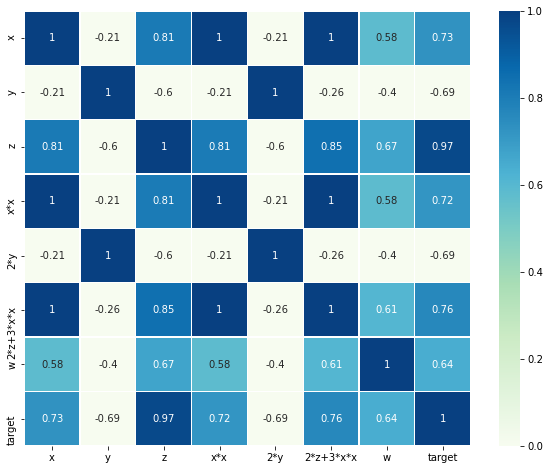

In [6]:
fig, ax = plt.subplots(figsize=(10,8))
ax = sns.heatmap(data.corr(), vmin=0, vmax=1, annot=True, linewidth=0.2, cmap='GnBu')

### 2. Finding the best model for the given data

In [7]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, stratify=y)

In [8]:
C=[0.00001, 0.00005, 0.0001, 0.0005, 0.001, 0.005, 0.01, 0.05, 0.1, 0.5, 1, 5, 10, 50, 100, 500, 1000, 2500, 5000, 10000]
log_alphas = [np.log10(a) for a in C]

distributions = dict(C=log_alphas,
                     penalty=['l2', 'l1'])
model = LogisticRegression()

clf = RandomizedSearchCV(model, distributions, cv=3, scoring='roc_auc')

top_model = clf.fit(X_train, y_train)

print('Best Penalty:', top_model.best_estimator_.get_params()['penalty'])
print('Best C:', top_model.best_estimator_.get_params()['C'])
print('Best AUC score: ', clf.best_score_)
print('='*50)

Best Penalty: l2
Best C: 0.6989700043360189
Best AUC score:  1.0


In [9]:
from sklearn.metrics import accuracy_score

best_model = LogisticRegression(C=3, penalty='l2', fit_intercept=True, class_weight='balanced')
best_model.fit(X_train, y_train)

LogisticRegression(C=3, class_weight='balanced')

### 3. Getting the weights with the original data

In [10]:
y_pred = best_model.predict(X_test)
best_model_accuracy = accuracy_score(y_pred, y_test)
print('The accuracy for the best model: ', best_model_accuracy)

The accuracy for the best model:  1.0


In [11]:
print('The weights of the best model: ', best_model.coef_)

The weights of the best model:  [[ 0.82834244 -0.97474895  2.09849794  0.75211145 -0.97474895  0.93026347
   0.59702973]]


### 4. Modifying original data

In [12]:
for i in data.columns[0:-1]:
    data[i] = 0.01+data[i]

In [13]:
X = data.drop(['target'], axis=1).values
y = data['target'].values

In [14]:
X2_train, X2_test, y2_train, y2_test = train_test_split(X, y, test_size=0.33, stratify=y)

In [15]:
almost_best_model = LogisticRegression(C=3, penalty='l2', fit_intercept=True, class_weight='balanced')
almost_best_model.fit(X2_train, y2_train)

LogisticRegression(C=3, class_weight='balanced')

In [16]:
y2_pred = almost_best_model.predict(X2_test)
almost_best_model_accuracy = accuracy_score(y2_pred, y2_test)
print('The accuracy for the almost best model: ', almost_best_model_accuracy)

The accuracy for the almost best model:  1.0


In [17]:
print('The weights of the almost best model: ', almost_best_model.coef_)

The weights of the almost best model:  [[ 0.88401202 -0.97966536  2.09261835  0.79299364 -0.97966536  0.96634706
   0.62534456]]


### 5 .  Checking deviations in metric and weights 
    a. find the difference between 'best_model_accuracy_edited' and 'best_model_accuracy'
    b. find the absolute change between each value of W and W' ==> |(W-W')|
    c. print the top 4 features which have higher % change in weights 
    compare to the other feature

In [18]:
print('The differnce between both accuracies is: ', almost_best_model_accuracy - best_model_accuracy)

The differnce between both accuracies is:  0.0


In [19]:
weight_difference = abs(best_model.coef_ - almost_best_model.coef_)
print("The absolute change between each value of W and W': ", weight_difference)

The absolute change between each value of W and W':  [[0.05566958 0.00491641 0.0058796  0.04088219 0.00491641 0.03608359
  0.02831483]]


In [20]:
d = {}
for key, value in zip(data.columns[0:-1], weight_difference[0]):
    d.update({key:value})             

In [21]:
sorted_weights = sorted(d.items(), key = lambda kv: kv[1])
print(sorted_weights[::-1])

[('x', 0.05566957545306406), ('x*x', 0.04088219060264964), ('2*z+3*x*x', 0.036083590993214454), ('w', 0.02831483316640615), ('z', 0.005879597915972923), ('2*y', 0.004916406885147939), ('y', 0.004916406885147939)]


In [22]:
print('Features with the highest change: ', sorted_weights[::-1])

Features with the highest change:  [('x', 0.05566957545306406), ('x*x', 0.04088219060264964), ('2*z+3*x*x', 0.036083590993214454), ('w', 0.02831483316640615), ('z', 0.005879597915972923), ('2*y', 0.004916406885147939), ('y', 0.004916406885147939)]


## Task 2


### 1. Finding the Correlation between the features

In [23]:
print('The differnce between both accuracies is: ', almost_best_model_accuracy - best_model_accuracy)

The differnce between both accuracies is:  0.0


In [24]:
weight_difference = abs(best_model.coef_ - almost_best_model.coef_)
print("The absolute change between each value of W and W': ", weight_difference)

The absolute change between each value of W and W':  [[0.05566958 0.00491641 0.0058796  0.04088219 0.00491641 0.03608359
  0.02831483]]


In [25]:
lst = []
for key in sorted(d):
    lst.append("{0}: {1}".format(key, d[key]))

In [26]:
print('Features with the highest change: ', lst[::-1][0:4])

Features with the highest change:  ['z: 0.005879597915972923', 'y: 0.004916406885147939', 'x*x: 0.04088219060264964', 'x: 0.05566957545306406']


In [27]:
C=[0.00001, 0.00005, 0.0001, 0.0005, 0.001, 0.005, 0.01, 0.05, 0.1, 0.5, 1, 5, 10, 50, 100, 500, 1000, 2500, 5000, 10000]
log_alphas = [np.log10(a) for a in C]

distributions = dict(C=log_alphas,
                     kernel=['linear', 'rbf'])
model = svm.SVC()

clf = RandomizedSearchCV(model, distributions, cv=3, scoring='roc_auc')

top_model = clf.fit(X_train, y_train)

print('Best Penalty:', top_model.best_estimator_.get_params()['kernel'])
print('Best C:', top_model.best_estimator_.get_params()['C'])
print('Best AUC score: ', clf.best_score_)
print('='*50)

Best Penalty: rbf
Best C: 3.0
Best AUC score:  1.0


In [28]:
from sklearn.metrics import accuracy_score

best_model = svm.SVC(C=0.69, kernel='linear', class_weight='balanced')
best_model.fit(X_train, y_train)

SVC(C=0.69, class_weight='balanced', kernel='linear')

### 3. Getting the weights with the original data

In [29]:
y_pred = best_model.predict(X_test)
best_model_accuracy = accuracy_score(y_pred, y_test)
print('The accuracy for the best model: ', best_model_accuracy)

The accuracy for the best model:  1.0


In [30]:
print('The weights of the best model: ', best_model.coef_)

The weights of the best model:  [[ 0.35948583 -0.31718921  1.00906181  0.29499107 -0.31718921  0.38732092
   0.18617242]]


### 4. Modifying original data

In [31]:
for i in data.columns[0:-1]:
    data[i] = 0.01+data[i]

In [32]:
X = data.drop(['target'], axis=1).values
y = data['target'].values

In [33]:
X2_train, X2_test, y2_train, y2_test = train_test_split(X, y, test_size=0.33, stratify=y)

In [34]:
almost_best_model = LogisticRegression(C=3, penalty='l2', fit_intercept=True, class_weight='balanced')
almost_best_model.fit(X2_train, y2_train)

LogisticRegression(C=3, class_weight='balanced')

In [35]:
y2_pred = almost_best_model.predict(X2_test)
almost_best_model_accuracy = accuracy_score(y2_pred, y2_test)
print('The accuracy for the almost best model: ', almost_best_model_accuracy)

The accuracy for the almost best model:  1.0


In [36]:
print('The weights of the almost best model: ', almost_best_model.coef_)

The weights of the almost best model:  [[ 0.85779172 -1.02560254  2.09590515  0.7625755  -1.02560254  0.93936702
   0.52986848]]


### 5 .  Checking deviations in metric and weights 

In [37]:
print('The differnce between both accuracies is: ', almost_best_model_accuracy - best_model_accuracy)

The differnce between both accuracies is:  0.0


In [38]:
weight_difference = abs(best_model.coef_ - almost_best_model.coef_)
print("The absolute change between each value of W and W': ", weight_difference)

The absolute change between each value of W and W':  [[0.49830589 0.70841333 1.08684333 0.46758443 0.70841333 0.5520461
  0.34369606]]


In [39]:
d = {}
for key, value in zip(data.columns[0:-1], weight_difference[0]):
    d.update({key:value})             

In [40]:
sorted_weights = sorted(d.items(), key = lambda kv: kv[1])

In [41]:
print('Features with the highest change: ', sorted_weights[::-1])

Features with the highest change:  [('z', 1.086843332235253), ('2*y', 0.7084133324669484), ('y', 0.7084133324669484), ('2*z+3*x*x', 0.5520461020467411), ('x', 0.4983058910568803), ('x*x', 0.4675844294513532), ('w', 0.34369606151097093)]
